In [ ]:
# Setup autoreload and add parent dir to sys.path
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'..')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size']=18

In [2]:
howell = pd.read_csv("./data/Howell1.csv", sep=";")
howell_female = howell[howell['male']==0]
howell_female

,height,weight,age,male
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
4,145.415,41.276872,51.0,0
6,149.225,38.243476,32.0,0
8,147.955,34.869885,19.0,0
...,...,...,...,...
533,152.400,40.823280,49.0,0
534,162.560,47.031821,27.0,0
536,67.945,7.229122,1.0,0
537,142.875,34.246196,31.0,0


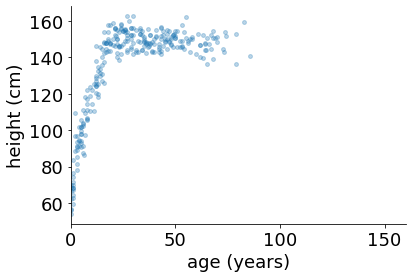

In [3]:
plt.scatter(howell_female['age'], howell_female['height'], alpha=0.3, s=15)
sns.despine()
plt.xlabel("age (years)")
plt.ylabel("height (cm)")
plt.xlim((0, 160))
plt.show()

In [10]:
X, y = np.array(howell_female['age']), np.array(howell_female['height'])
X.shape, y.shape

((287,), (287,))

## Applying Local DP to the labels $y$
We need to normalize $y$ and then apply Laplace noise proportional to $\Delta(y)$: 
$$y_i + \text{Lap}(0, \frac{\Delta(y)}{\varepsilon}$$

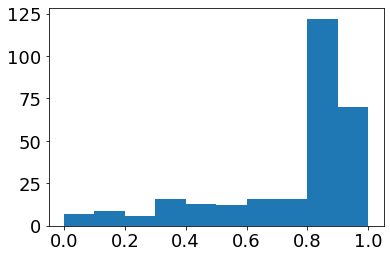

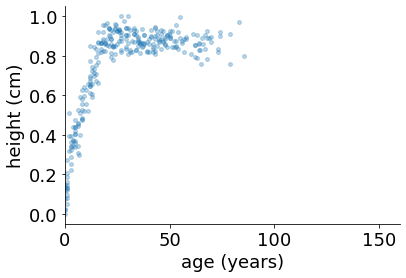

In [11]:
y = (y-y.min())/(y.max()-y.min())
plt.hist(y)
plt.show()
plt.scatter(X, y, alpha=0.3, s=15)
sns.despine()
plt.xlabel("age (years)")
plt.ylabel("height (cm)")
plt.xlim((0, 160))
plt.show()

In [12]:
# Laplace and Gauss Mechanisms
delta = round(1/len(X), 4)
print("delta=", delta)
laplace_mech = lambda inp, eps, sens: inp + np.random.laplace(loc=0, scale=sens/eps, size=inp.shape)
gauss_mech = lambda inp, eps, sens: inp + np.random.normal(loc=0, scale=sens*(np.sqrt(2*np.log(1.25/delta)))/eps, size=inp.shape)

delta= 0.0035


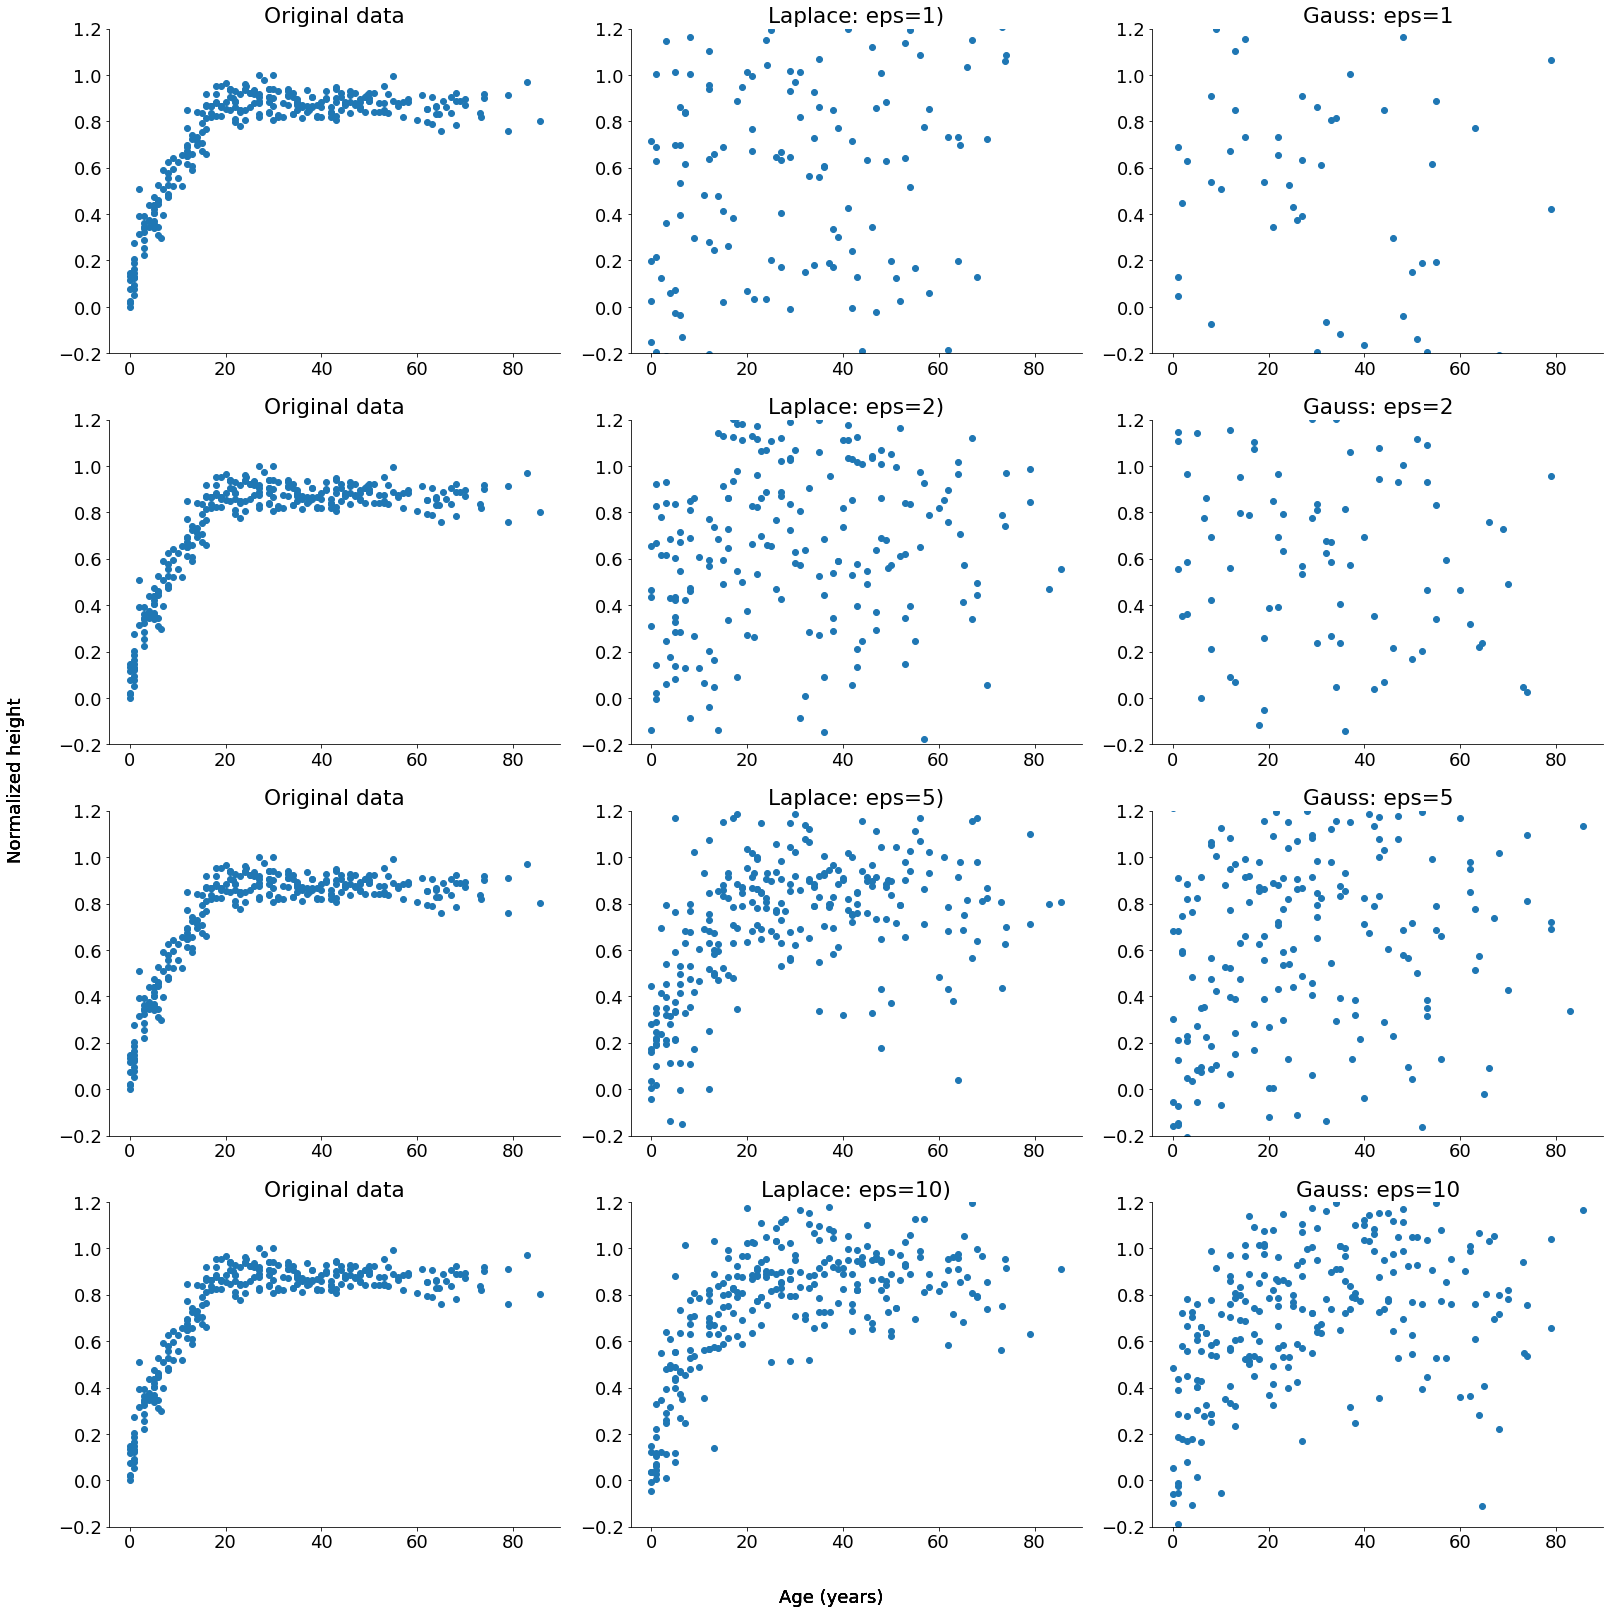

In [13]:
fig, axes = plt.subplots(4, 3, figsize=(22, 22))
for i, e in enumerate([1, 2, 5, 10]):
    # applying Laplace and Gauss mechanism
    y_priv_lap = laplace_mech(y, e, 1.0)
    y_priv_gauss = gauss_mech(y, e, 1.0)
    # plotting
    axes[i, 0].scatter(X, y)
    axes[i, 0].set_title("Original data")
    axes[i, 0].set_ylim((-0.2, 1.2))
    axes[i, 1].scatter(X, y_priv_lap)
    axes[i, 1].set_title(f"Laplace: eps={e})")
    axes[i, 1].set_ylim((-0.2, 1.2))
    axes[i, 2].scatter(X, y_priv_gauss)
    axes[i, 2].set_title(f"Gauss: eps={e}")
    axes[i, 2].set_ylim((-0.2, 1.2))
    fig.text(0.5, -0.02, 'Age (years)', ha='center')
    fig.text(-0.02, 0.5, 'Normalized height', va='center', rotation='vertical')
    sns.despine()
    plt.tight_layout()
    #plt.savefig("figures/local_dp_comparison_Kung.svg")